### Getting data from yann lecunn dataset

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [1]:
import idx2numpy
import seaborn as sns

#### Extract Training data

In [2]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [3]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
X_train.shape

(60000, 784)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train.shape

(60000,)

#### Extract Test data

In [7]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [8]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
X_test.shape

(10000, 784)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
y_test.shape

(10000,)

#### Function to display a digit image from one 1-d representation of pixels

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
   
    image = image.reshape(28,28)
    sns.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    #plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Image Representation for %d" %(label))
    plt.show()

##### Displaying a set of digits

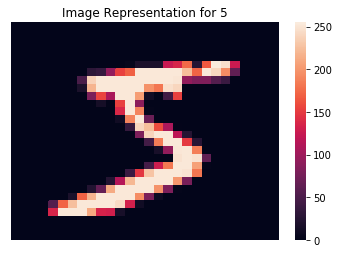

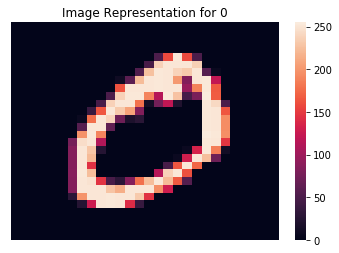

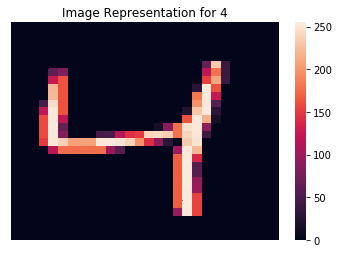

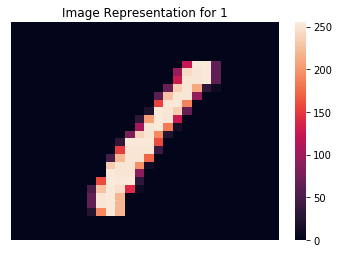

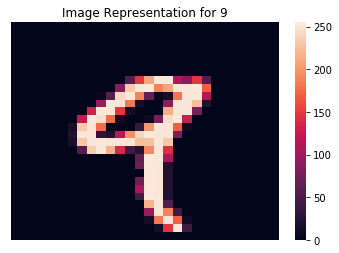

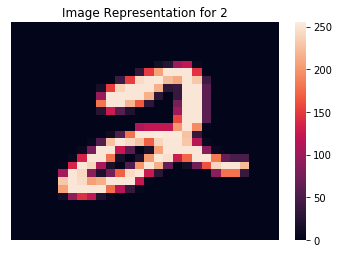

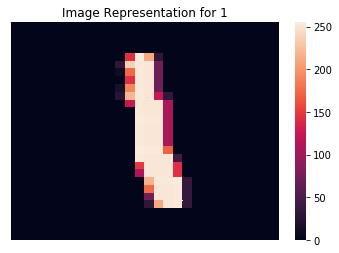

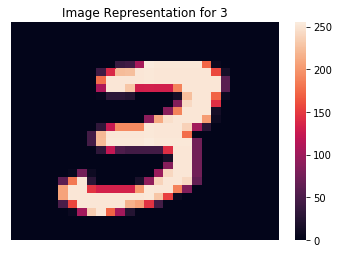

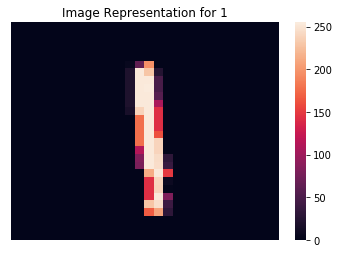

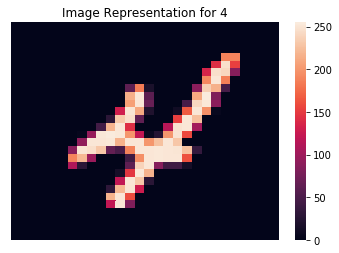

In [13]:
for i in range(10):
    display(X_train[i],y_train[i])

# Decision Tree

In [14]:
from sklearn import tree
from sklearn.model_selection import cross_val_predict


dt_clf = tree.DecisionTreeClassifier( max_depth=100)

y_train_pred = cross_val_predict(dt_clf, X_train, y_train, cv=3)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

##### Calculate Cross Validation Score

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.85532893,  0.85969298,  0.8640296 ])

y_train_pred is the predicted values in the train set such that the model has never seen the data before

In [16]:
y_train_pred

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Create a confusion matrix for cross validation prediction & actual labels**

In [18]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_train_pred)

In [19]:
confusionMatrix

array([[5409,    6,   70,   62,   46,   99,   92,   27,   78,   34],
       [   5, 6374,   86,   48,   25,   39,   28,   36,   82,   19],
       [  73,   78, 4931,  195,  135,   52,   86,  147,  198,   63],
       [  52,   54,  178, 5058,   53,  274,   56,  109,  194,  103],
       [  33,   32,   85,   44, 4994,   70,   84,   89,  113,  298],
       [  86,   64,   57,  268,   74, 4381,  153,   43,  163,  132],
       [  73,   38,   79,   46,  113,  156, 5244,   14,  122,   33],
       [  28,   34,  125,   95,   63,   53,   10, 5617,   51,  189],
       [  77,  111,  189,  209,  138,  181,  103,   63, 4586,  194],
       [  41,   26,   58,  122,  262,  114,   32,  185,  147, 4962]], dtype=int64)

**Plot the Confusion matrix showing the diagonals.**

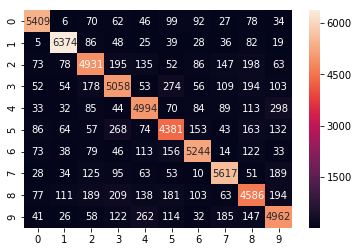

In [20]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [21]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

In [22]:
import numpy as np
#import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)

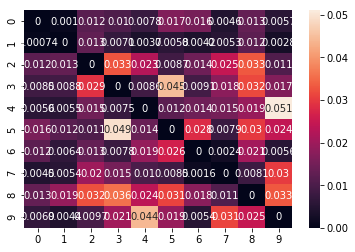

In [23]:
ax = sns.heatmap(norm_conf_mx,annot=True)

**Plot Confusion Matrix against Test data**

In [24]:
y_test_pred = dt_clf.predict(X_test)
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [25]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 911,    1,    9,    7,    4,   11,   12,    5,   12,    8],
       [   1, 1084,    8,    5,    1,    4,    8,    5,   15,    4],
       [  12,   11,  880,   39,   14,   12,    9,   25,   22,    8],
       [  11,    5,   28,  855,    6,   51,    2,   11,   21,   20],
       [   7,    3,    8,    4,  862,   11,   18,    8,   23,   38],
       [  15,    6,    3,   48,   11,  736,   24,    5,   31,   13],
       [  17,    5,   12,    8,   19,   17,  847,    1,   29,    3],
       [   4,   12,   27,   14,    9,    5,    3,  928,    6,   20],
       [   9,    6,   31,   39,   17,   29,   16,    8,  794,   25],
       [  12,    2,    9,   23,   41,    9,    7,   21,   24,  861]], dtype=int64)

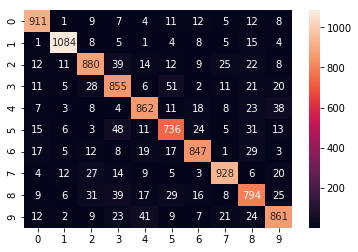

In [26]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [27]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

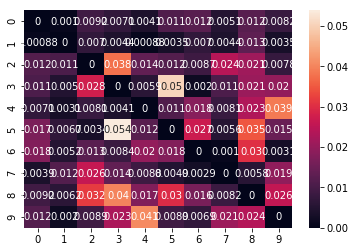

In [28]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.87580000000000002